---
title: "Dividing Drake's Career into Eras"
description: "Final Project for DH140"
author: "Harvey Zhao"
date: "08/01/2024"
date-modified: "08/01/2024"
---

## Introduction

Drake has been on the news lately for shameful reasons. His career has taken a hit from his allegedly impure relationship with minors. This was hard to bear, since I am a big fan of Drake's smooth chorus and catchy lyrics. Although his future looks uncertain, Drake has had his ups and downs since he began rapping. I want to dive deep into over 200 of his songs **between 2007 and 2018**, analyze their **emotion, recurring theme and linguistic complexity** to roughly sort his career into eras. My research question is *How have the emotion, recurring themes, and linguistic complexity in Drake's lyrics evolved between 2007 and 2018, and can these changes be used to delineate distinct eras in his musical career?* 

<div>
  <img src="https://coronadoexplorer.com/wp-content/uploads/2023/08/Drake-e1693935526783.png" height="200px"></img>
</div>

OG Drake fans reached a concensus on Drake's eras. 
### Sentimental youngin: 2007-2010
in his early career, from 2007 to 2010, his work particularly with the release of *So Far Gone* in 2009, was characterized by vulnerability and introspection, laying the groundwork for his distinctive fusion of rap and R&B.

### Lady's man: 2010-2012
With the release of *Thank Me Later* in 2010 and *Take Care* in 2011, Drake refined his production added in a rich tapestry of Jamaican musical style. He became the street-smart Canadian kid that understands women.

### Pop-Icon: 2013-2015
During the era from 2013 to 2015, Drake finally came on top with hits like *Hold On, We’re Going Home* and *Hotline Bling*. He was more hesitant to release new albums and was more lyrical. Drake's fans think this era was his golden age - when he was positive and didn't flash money or use women as his music appeal. Drake's lyrics during this time often focused on the themes of fame, success, and the challenges that accompany them. He explored the highs and lows of his celebrity status, showcasing a more polished and refined musical style. Critics noted how he combined catchy hooks with introspective verses, allowing listeners to connect with his experiences while also enjoying the infectious rhythms.

Let's find out whether Drake changed over the years through his lyrics.

source: 
1. [Drake Fans discuss different periods in Drake's hip-hop career](https://www.reddit.com/r/Drizzy/comments/173e26s/eras_of_drake/)
2. [Business Insider recounts Drake's rise to stardom](https://www.businessinsider.com/drake-life-career-timeline-2018-10#in-2001-at-14-years-old-he-landed-a-role-on-the-famous-canadian-teenage-drama-degrassi-3)

## Methods

Between 2009 and 2018, I scraped all Drake lyrics available on Genius using the lyricsGenius library. The dataset, **comprising over 500 songs, includes details such as song name, album, year of release, and complete lyrics.**

In my exploratory analysis, I focused on the number of songs per album, yearly release trends, and word count distribution across Drake's discography. Additionally, I identified songs with the highest and lowest word counts.

**In my deeper analysis, I focused on calculating sentiment of individual Drake songs through 2 popular NLP libraries. I got an idea of negative, positive and neutral sentiment through exploring 3 songs in each category. Then, I computed 2 graphs - how Drake songs' sentiment varies every year, and how earlier albums' sentiments compare to later albums. Through some pattern recognition and digging of his life events, I found 4 distinct periods in Drake's music career.**

However, the dataset presented challenges. While there are over 500 rows, only 221 have complete data. Missing information, mainly release dates and album names, was common, especially for singles. Given that singles are a critical aspect of modern music distribution, this posed a potential issue. Some songs might have been excluded due to missing release dates or album associations.

The scraping process itself was imperfect. Using an older version of lyricsgenius, I encountered issues like non-lyrical annotations (e.g., [Intro], \n) embedded in the lyrics. With limited experience in advanced data cleaning, some noise, redundant characters, and annotations likely slipped through.

Cleaning the dataset was a challenging task. Out of the initial 500+ songs, I filtered out around 300 tracks that were duplicates, live versions, or diss tracks. Despite the simplicity of the API, the cleaning process demanded considerable effort to handle the noise and ensure data quality.

### Getting the dataset

In [ ]:
# scraping data
from lyricsgenius import Genius

TOKEN = "REDACTED"
genius = Genius(TOKEN)
genius.excluded_terms = ["Remix", "Live", "Untitled", "u00e7e ", "Separate LivesVer", "Mashup", "Freestyle", "Leak",
                      "Diss", "Award", "Verse", "Dub", "Demo", "Awards", "Length", "Zin", "#", "version", None]
artist = genius.search_artist("Drake", max_songs=1)
lyrics = artist.save_lyrics()

In [ ]:
# create file paths + dataframe
import os
import glob
import json
import pandas as pd

path = './lyrics_files'
data_list = []

# Read and process JSON files
for filename in glob.glob(os.path.join(path, '*.json')):  # Only process .JSON files in the folder
  with open(filename, encoding='utf-8', mode='r') as json_file:
    data = json.load(json_file)
    songs = data.get('songs', [])
    for song in songs:
      data_list.append({
        'name': song.get('title'),
        'album': song.get('album'),
        'year': song.get('year'),
        'lyrics': song.get('lyrics')
      })

# Create DataFrame
lyrics_df = pd.DataFrame(data_list, columns=['name', 'album', 'year', 'lyrics'])

#### Negative Song - I Do this

#### Negative Song - I Do this

Here were the first 10 rows of the raw scraped dataset:

In [ ]:
lyrics_df.head(10)

,name,album,year,lyrics
0,Good Ones Go (Interlude),Take Care,2011-11-15,"[Intro]\nOh yeah\nOh yeah, oh yeah, oh\nOh yea..."
1,Keep the Family Close,Views,2016-04-29,[Intro]\nIt's a little chilly out there\nHow y...
2,Using Me,None,None,Yeah\n6 shit\n\nBeen with so many women I can’...
3,Light Up,Thank Me Later,2010-06-15,"[Verse 1: Drake]\nUh, I've been up for four da..."
4,Catch No Feelings,None,None,"[Drake]\nI told you from the jump, me and you ..."
5,These Days,None,2016-03-29,[Verse 1]\nI've been out walking\nI don't do t...
6,Overdose On Life,None,2008-04-30,And I'm a leave on one more note\nOne more mot...
7,Talk Up,Scorpion,2018-06-29,"[Intro: Drake]\nDJ Paul\nTWhy\nAyy, ayy\nLot o..."
8,Cannonball,Heartbreak Drake,None,"[Chorus: Colin Munroe]\nHow could I fly, but l..."
9,Thank You Note to 40,None,2016-04-28,Before we do this I just wanna say thanks man....


We are getting a lot of null values in album and year. We will only keep offically released songs for analysis, so any songs without an album or a release date needs to be gone.

### Cleaning Dataset

In [ ]:
# remove all rows that have null values
lyrics_df = lyrics_df.dropna(how='any', axis=0)
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 0 to 390
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    221 non-null    object
 1   album   221 non-null    object
 2   year    221 non-null    object
 3   lyrics  221 non-null    object
dtypes: object(4)
memory usage: 8.6+ KB


Voila, we dropped almost half of the entire database and retained 221 valid songs Drake released. Let's take a look at the first 5 rows:

In [ ]:
lyrics_df.head()

,name,album,year,lyrics
0,Good Ones Go (Interlude),Take Care,2011-11-15,"[Intro]\nOh yeah\nOh yeah, oh yeah, oh\nOh yea..."
1,Keep the Family Close,Views,2016-04-29,[Intro]\nIt's a little chilly out there\nHow y...
3,Light Up,Thank Me Later,2010-06-15,"[Verse 1: Drake]\nUh, I've been up for four da..."
7,Talk Up,Scorpion,2018-06-29,"[Intro: Drake]\nDJ Paul\nTWhy\nAyy, ayy\nLot o..."
10,Juice,Born Successful,2009-12-11,[Produced by Boi-1da]\n\n[Intro]\nBoi-1da... D...


I was debating whether I should include the month and date of release. However, Drake releases often and emotion of his songs fluctuates frequently. We happen to have a 200+ row dataset that spans 10+ years. Let's remove the month and date for every song's release date.

In [ ]:
lyrics_df['year'] = pd.to_datetime(lyrics_df['year']).dt.strftime('%Y')
lyrics_df = lyrics_df.sort_values('album')
lyrics_df.head()

,name,album,year,lyrics
155,Right to Left,Born Successful,2009,[Intro]\n[?]\n\n[Chorus: Drake]\nBlue green je...
200,Forever (Born Successful),Born Successful,2009,[Chorus: Drake]\nIt may not mean nothing to y'...
189,The Winner,Born Successful,2009,[Verse 1]\nI’m performing tonight you know tha...
181,I Do This,Born Successful,2009,"[Verse 1: Drake]\nUh, shit's all good\nThe dea..."
120,Fallen,Born Successful,2009,"[Intro: Drake]\nYeah, it's Drake, KC\n\n[Verse..."


The scraped lyrics contain special characters like *\n* and *[intro]*. Let's try clean up the lyrics so we get exactly what Drake raps. We will use regex to filter out structure words like "outro", "chorus" and "intro" and do some other magic on a few songs that we have to clean up manually. 

In [ ]:
import re

def clean_lyrics(lyrics):
    if not lyrics:
        return lyrics

    # Remove apostrophes
    lyrics = lyrics.replace("'", "")

    # Remove song structure tags or instructions in brackets
    lyrics = re.sub(r'[\*\[\(\{].*?[\*\]\)\}]', ' ', lyrics)
    
    # Remove variations of Verse 1, VERSE 2, etc.
    lyrics = re.sub(r'\b[Vv]erse \d+\b', '', lyrics)
    
    # Remove specific structure markers formatted as all caps without brackets
    structure_words = ['OUTRO', 'INSTRUMENTAL', 'PRE', 'HOOK', 'PRODUCED', 'REFRAIN', 
                       'POST', 'REPEAT', '2x', '3x', '4x', 'CHORUS', 'INTRO', 'INTERLUDE']
    for word in structure_words:
        lyrics = lyrics.replace(word, '')
    
    # Remove variations of Chorus, Intro, Instrumental, Bridge, Hook, Repeat
    lyrics = re.sub(r'\b[Cc]horus\b.*', '', lyrics)
    lyrics = re.sub(r'\b[Ii]ntro\b.*', '', lyrics)
    lyrics = re.sub(r'\b[Ii]nstrumental\b.*', '', lyrics)
    lyrics = re.sub(r'\b[Bb]ridge\b.*', '', lyrics)
    lyrics = re.sub(r'\b[Hh]ook\b.*', '', lyrics)
    lyrics = re.sub(r'\b[Rr]epeat\b.*', '', lyrics)

    # Remove credits
    lyrics = re.sub(r'.*[Pp]roduced [Bb]y.*', ' ', lyrics)
    lyrics = re.sub(r'.*[Ww]ritten [Bb]y.*', ' ', lyrics)
    
    # Remove strays and typos
    stray_patterns = [
        r'\[Outro\[', r'Sax & background & instrumental\)', r'\nSource: ', 
        r'Shotgun 2: 58 Trk 1 \n  \nJr. Walker & The All Stars \nAnd/or The Funk Brothers - instrumental \nPop Chart #4 Feb 13, 1965 \nSoul Label - 35008 \n ',
        r'- musical interlude -', r'\nRefrain:'
    ]
    for pattern in stray_patterns:
        lyrics = re.sub(pattern, ' ', lyrics)
    
    # Replace all punctuations with spaces
    lyrics = re.sub(r'[^\w\s]', ' ', lyrics)
    
    # Replace consecutive whitespaces with a single space
    lyrics = re.sub(r'\s+', ' ', lyrics).strip()
    
    # Convert all tokens to lowercase
    lyrics = lyrics.lower()

    return lyrics

In [ ]:
lyrics_df['lyrics'] = lyrics_df['lyrics'].map(clean_lyrics)
lyrics_df.head()

,name,album,year,lyrics
155,Right to Left,Born Successful,2009,blue green jewels with the supreme fuel and lo...
200,Forever (Born Successful),Born Successful,2009,it may not mean nothing to yall but understand...
189,The Winner,Born Successful,2009,i m performing tonight you know that shit gone...
181,I Do This,Born Successful,2009,uh shits all good the deal got signed and my s...
120,Fallen,Born Successful,2009,yeah its drake kc we was just walking just smi...


As you can see, lyrics are essentially a transcript of Drake's songs now. We are done with cleaning the data!

### High Level Overview of Dataset

Let's look at 5 details in our dataset to gauge what data we are dealing with.
1) How many songs did Drake release
2) Number of albums
3) Number of years Drake made a release
4) First and last year of songs in this table
5) Word count distribution of Drake's songs

You can view the detailed code at https://github.com/harveyzzhao/DH140.

* Drake had **221** officially released songs and **22** albums in this dataset. Compared to other hip hop artists, Drake was one of the most productive.

* This dataset spans 14 years from **2006 to 2019.**

Drake releases more than 5 songs most years up to **30+ songs** in 2009. Hmm, he must have been really hardworking back then or something else is going on...

![image.png](./drake-song-per-year.png)

Drake on average has **500+** words per song. He had a mere **9 (!!!)** words for his least verbose song, and **1122** words for his most verbose song (is he writing an essay??)

He was the most verbose in 2013, where he smashed his maximum word count record and did not drop below 500 words in one of his least verbose song.
He visibly spiked his word count from 2013 to 2015. It just happened to be the 3 years before his most successful years in terms of new listener count, spotify streams and number of songs on billboard top 100.

![image.png](./drake-word-count-distribution.png)

I was interested to see his most verbose songs and least verbose songs. Here is a breakdown of the top 5 most verbose and the top 5 least verbose songs.

![image.png](./top-verbose-songs.png)

### Focused Analysis

Now we have analyzed word count of Drake's songs, and his productivity over the years, let's dive into his song's emotions.

To analyze Drake's lyrics and identify distinct periods in his music career, we will follow a structured approach focusing on sentiment analysis, keyword analysis, and lexical diversity.
#### sentiment analysis
First, we will use ntlk to break each song's lyrics into words and use ntlk's opinion lexicon to get the sentiment of each word in lyrics. Then, we will add up the sentiment score of every word and compare all songs into a barchart. Then, we will model his 200+ songs with a trendline.

#### How to find distinct periods
To identify distinct periods, we will combine the results from sentiment analysis, keyword frequency, and lexical diversity into a single dataset. Using clustering algorithms like K-means, we will segment the songs into groups based on these features, revealing natural groupings that indicate different phases in Drake's music career. Through these detailed analyses, we aim to provide a comprehensive understanding of how Drake's sentiment has evolved over time.

#### Sentiment Analysis

We are using two different sentiment analyzers, **VADER** and nltk's **opinion lexicon** to get a more unbiased opinion of Drake's lyrics. First, we will use Vader's sentiment analyzer to model the sentiment of Drake's songs. **VADER (Valence Aware Dictionary and sEntiment Reasoner)** is designed for analyzing sentiment in **social media** texts. It combines a sentiment lexicon with rules to handle punctuation, capitalization, and intensity modifiers, making it effective for informal text analysis. 

**Why I chose Vader for sentiment analysis**

VADER is well-suited for analyzing Drake's lyrics due to its adaptability to social media language, ability to capture nuances in sentiment, and straightforward implementation. It efficiently quantifies sentiment, handling elements like slang, emphasis, and intensity, which are common in song lyrics.

In [ ]:
import nltk
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download("stopwords")
nltk.download("vader_lexicon")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harvey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/harvey/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
stopwords_set = set(stopwords.words("english"))
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

<BarContainer object of 221 artists>

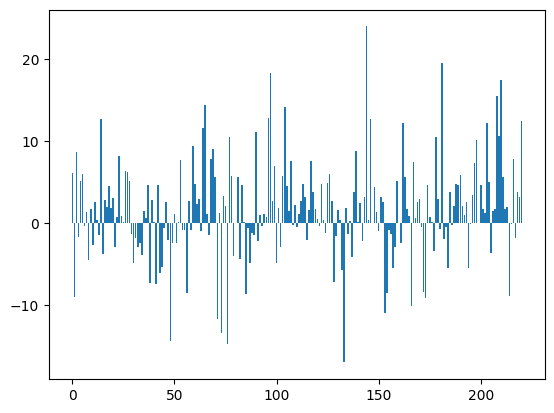

In [ ]:
import pandas as pd
df = pd.read_csv("lyrics.csv")
df['tokenized'] = df['lyrics'].apply(word_tokenize)

sentiment_scores_vader = []
for tokens in df["tokenized"]:
  song_sentiment_score = sum([sentiment_analyzer.polarity_scores(token)["compound"] for token in tokens])
  sentiment_scores_vader.append(song_sentiment_score)

plt.bar(list(range(len(df))), sentiment_scores_vader)

This graph doesn't make much sense. Each bar is very thin and we can't easily see a pattern without having release date as the x axis. Let's group each song's sentiment by year of release and use a box plot to show distribution of each year's sentiment.

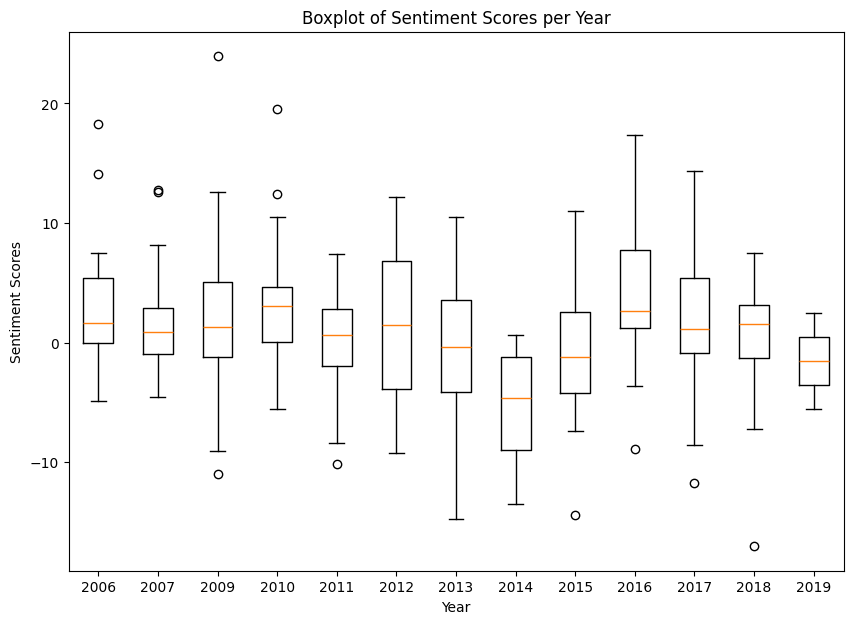

In [ ]:
df["sentiment_scores_vader"] = sentiment_scores_vader

df_boxplot = df.groupby("year")["sentiment_scores_vader"].apply(list).reset_index(name="scores")

# Create a boxplot for each year's sentiment scores
plt.figure(figsize=(10, 7))
plt.boxplot(df_boxplot['scores'], labels=df_boxplot['year'])
plt.xlabel('Year')
plt.ylabel('Sentiment Scores')
plt.title('Boxplot of Sentiment Scores per Year')
plt.show()

Now we can clearly see how sentiment roughly changes year by year. From 2006 to 2007, Drake kept his lyrics positive, with the most negative song being much more positive than the most negative quartile of songs in 2014. This stage also displayed quite a small variation, especially 2007 where the middle 50% of songs are the most similar in sentiment among all of his songs. To see what it means to be neutral in sentiment (0 sentiment score), positive (0-5), and negative (0 to -5), let's pick 2 songs from each category.

In [ ]:
# Select 2 songs with neutral sentiment
neutral_songs = df[(df['sentiment_scores_vader'] <= 0.2) & (df["sentiment_scores_vader"] > -0.2)].sample(2)['name']

# Select 2 songs with positive sentiment
positive_songs = df[(df['sentiment_scores_vader'] > 0.2) & (df['sentiment_scores_vader'] <= 5)].sample(2)['name']

# Select 2 songs with negative sentiment
negative_songs = df[(df['sentiment_scores_vader'] <= 0.2) & (df['sentiment_scores_vader'] >= -5)].sample(2)['name']

print("Neutral songs: ", neutral_songs.values)
print("Positive songs: ", positive_songs.values)
print("Negative songs: ", negative_songs.values)

Neutral songs:  ['Marvin’s Room' 'November 18th']
Positive songs:  ['Glow' 'Asthma Team']
Negative songs:  ['Stunt Hard' 'Karaoke']


We choose *Nothing Into Somethings* as neutral song,* Hotline Bling* as positive song, and *I Do This* as negative song.

They have a score of 0.13, 4.56 and -1.78. Let's investigate what each number means.

In [ ]:
print(df.loc[df["name"] == "Nothings Into Somethings"]["sentiment_scores_vader"])

print(df.loc[df["name"] == "Hotline Bling"]["sentiment_scores_vader"])

print(df.loc[df["name"] == "I Do This"]["sentiment_scores_vader"])

52    0.1313
Name: sentiment_scores_vader, dtype: float64
200    4.5687
Name: sentiment_scores_vader, dtype: float64
3   -1.7778
Name: sentiment_scores_vader, dtype: float64


#### Neutral Song - *Nothing Into Somethings* analysis

#### Nothing into Something Lyrics Analysis

Drake's song "Nothing Into Somethings" is generally viewed as having a neutral to slightly negative connotation. The song deals with themes of reflection and the complexities of relationships and success. 

A sentiment score of near 0 means Drake did not mention any violence, suicidal or generally depressing topics. Drake simply told his personal issues - a failed relationship and the emotional toll it takes.

#### Nothing Into Somethings Lyrics:
You'll hear some slow tracks, you know what I'm sayin'?

With, like, some pimpin' to it, or somethin'

That you can relax, pop a top to, or somethin'?

Big cup of Act', I'm drowsy

I'm still posted up where you first found me

Did I just read that you just got engaged on me?

I heard from your friend, you couldn't even tell me

Or better yet wait on me

Nah, sha-nah-nah-nah-nah-nah-nah
Sha-nah-nah-nah-nah-nah-nah

Can't just leave it off that way
Sha-nah-nah-nah-nah-nah-nah
Sha-nah-nah-nah (nah)

Can't just leave it off that way, nah
Least, do I get an invitation or something?

A statement or something?

Ask about that, you would say it was nothing

But here's another nothing that you made into something

Can't just leave it off that way

#### Positive Song - *Hotline Bling* Analysis
"Hotline Bling" is positive because it combines Drake's reflection on an ex-partner with an upbeating tone. Drake wrote playful lyrics and reminisced about the girl's independent past. However, in the lyrics he wished nothing bad for the girl and wondered how she was now.

Most importantly, Drake did not express his resentment towards his ex or insulted amnyone. Instead, he called his ex "my love", and descrived good times Drake and his ex spent. I would qualify this song as a positive for sure.

#### Hotline Bling Lyrics
You used to call me on my

You used to, you used to

Yeah

You used to call me on my cell phone

Late night when you need my love

Call me on my cell phone

Late night when you need my love


#### Negative Song - I Do this Analysis

I think this song is positive in that Drake is showing off his success and taunting other rappers. He mentioned that "the deal got signed" and "I'm a motherfuckin' genius" to reveal his recent success. I think Vader categorized this song as negative because it's not reading much context and weighed in filler words like "godammit", "motherfuckin'" and "shit". I propose we filter out these common rap filter words to get a more accurate representation of Drake song's sentiment.

#### I Do This Lyrics

[Verse 1: Drake]
Uh, shit's all good

The deal got signed, and my split's all good

And these haters pretending that it's all good

Say that shit in person man, I wish y'all would

I'm a motherfuckin' genius, goddammit

I ain't the type to murder you, I'm more the type to plan it

So please take a seat if you really can't stand it

Got success in my pocket and these rappers in a panic

But Belly told me to do me

And don't listen to anybody that knew me

'Cause to have known me would mean that there's a new me

And if you think I've changed, then the slightest could have fooled me

Yeah, and to my city I'm the 2-3

Drug dealers live vicariously through me

No bench time, nickname's "Starter Drake"

Franchise player, I don't even get a water break

And these other niggas is hardly mentioned

I bet that with this pen, I could draw attention

But you could tell by my strut

I'm just chillin' in the cut, nigga what, and I'm feelin' like

[Chorus: Drake & Belly]
I get it, I get it, I get it 'til I'm done

Tell them rappers I'm the man in the city that I run

So you holla at me pimpin' if you plannin' on a visit

And they say that you can talk it when you live it
...

#### Applying Filter and recompute sentiment

In [ ]:
# List of common rap song filler words
filler_words = [
    'fuck', 'fuckin', 'shit', 'motherfuckin', 'motherfucking', 
    'yo', 'uh', 'yeah', 'uh-huh', 'uh-uh', 'what', 'c\'mon', 
    'let\'s go', 'hey', 'ha', 'whoa', 'alright', 'okay', 'holla', 
    'check it', 'now', 'right', 'ayy', 'nah', 'mmm', 'word', 
    'you know', 'know what I\'m sayin\'', 'feel me', 'for real', 
    'no doubt', 'it\'s like', 'you dig', 'that\'s right', 'true', 
    'believe that', 'straight up'
]

stemmer = PorterStemmer()
df['stemmed_tokens'] = df['tokenized'].apply(lambda lyrics: [stemmer.stem(word) for word in lyrics])
stemmed_filler_words = [stemmer.stem(filler_word) for filler_word in filler_words]

# Assuming df is your DataFrame and it has a 'lyrics' column where each cell is a list of words
df['filtered_tokens'] = df['stemmed_tokens'].apply(lambda lyrics: [word for word in lyrics if word not in filler_words and word not in stemmed_filler_words])

<BarContainer object of 221 artists>

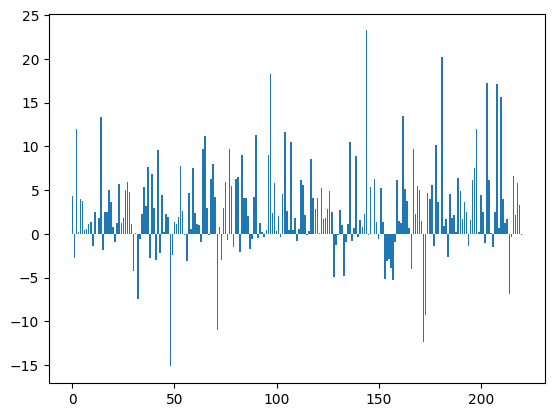

In [ ]:
sentiment_scores_vader = []
for tokens in df["filtered_tokens"]:
  song_sentiment_score = sum([sentiment_analyzer.polarity_scores(token)["compound"] for token in tokens])
  sentiment_scores_vader.append(song_sentiment_score)

plt.bar(list(range(len(df))), sentiment_scores_vader)

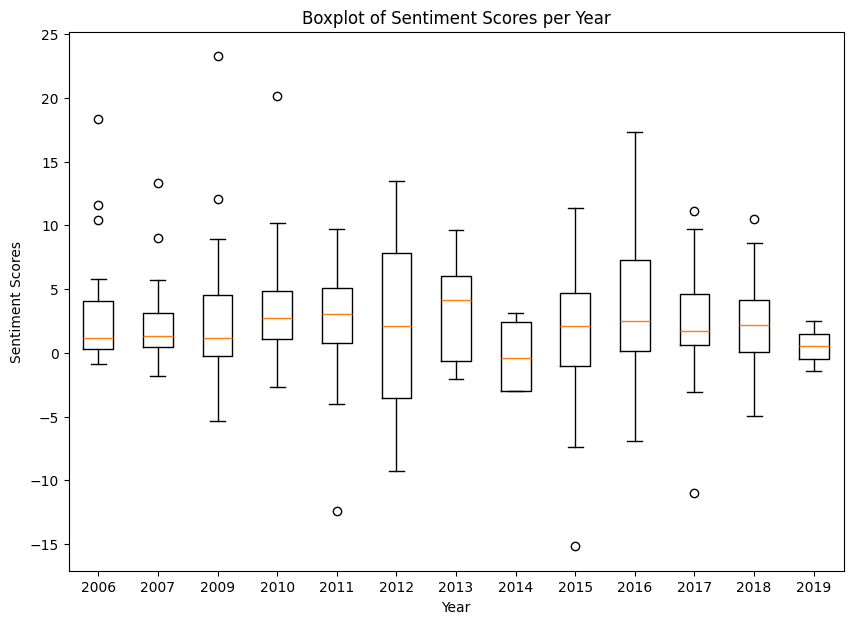

In [ ]:
df["sentiment_scores_vader"] = sentiment_scores_vader

df_boxplot = df.groupby("year")["sentiment_scores_vader"].apply(list).reset_index(name="scores")

# Create a boxplot for each year's sentiment scores
plt.figure(figsize=(10, 7))
plt.boxplot(df_boxplot['scores'], labels=df_boxplot['year'])
plt.xlabel('Year')
plt.ylabel('Sentiment Scores')
plt.title('Boxplot of Sentiment Scores per Year')
plt.show()

As we can see, Drake's songs are getting significantly more positive. Let's pull up *I Do this* sentiment score again.

In [ ]:
print(df.loc[df["name"] == "Nothings Into Somethings"]["sentiment_scores_vader"])

print(df.loc[df["name"] == "Hotline Bling"]["sentiment_scores_vader"])

print(df.loc[df["name"] == "I Do This"]["sentiment_scores_vader"])

52    1.9382
Name: sentiment_scores_vader, dtype: float64
200    4.4066
Name: sentiment_scores_vader, dtype: float64
3    0.2537
Name: sentiment_scores_vader, dtype: float64


![before after](./before-after-sentiment-filter.png)

The score has become much more reasonable.

Let's organize sentiment by album. Is there a distinct shift in sentiment from album to album?

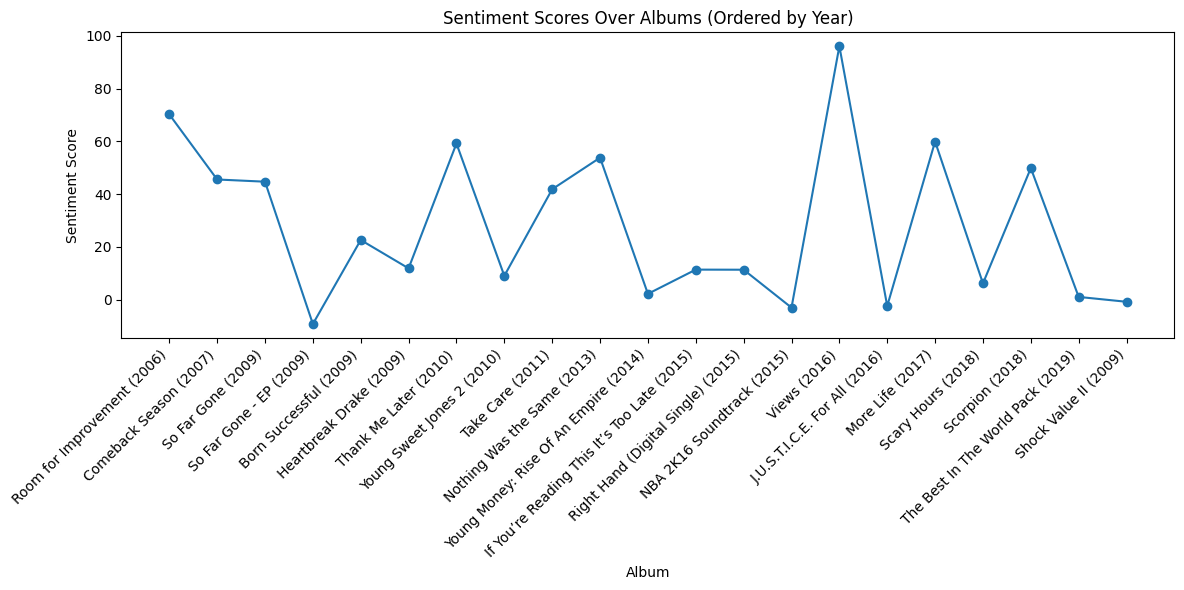

In [ ]:
# Group by 'album' and sum the 'sentiment_scores_vader' column
# Group by 'album' and 'year' and sum the 'sentiment_scores_vader' column
# Sorted list based on release dates:
sorted_albums = [
  'Room for Improvement',
  'Comeback Season',
  'So Far Gone',
  'So Far Gone - EP',
  'Born Successful',
  'Heartbreak Drake',
  'Thank Me Later',
  'Young Sweet Jones 2',
  'Take Care',
  'Nothing Was the Same',
  'Young Money: Rise Of An Empire',
  'If You’re Reading This It’s Too Late',
  'Right Hand (Digital Single)',
  'NBA 2K16 Soundtrack',
  'Views',
  'J.U.S.T.I.C.E. For All',
  'More Life',
  'Scary Hours',
  'Scorpion',
  'The Best In The World Pack',
  'Shock Value II'
]

sorted_albums_with_years = [
    'Room for Improvement (2006)',
    'Comeback Season (2007)',
    'So Far Gone (2009)',
    'So Far Gone - EP (2009)',
    'Born Successful (2009)',
    'Heartbreak Drake (2009)',
    'Thank Me Later (2010)',
    'Young Sweet Jones 2 (2010)',
    'Take Care (2011)',
    'Nothing Was the Same (2013)',
    'Young Money: Rise Of An Empire (2014)',
    'If You’re Reading This It’s Too Late (2015)',
    'Right Hand (Digital Single) (2015)',
    'NBA 2K16 Soundtrack (2015)',
    'Views (2016)',
    'J.U.S.T.I.C.E. For All (2016)',
    'More Life (2017)',
    'Scary Hours (2018)',
    'Scorpion (2018)',
    'The Best In The World Pack (2019)',
    'Shock Value II (2009)',
]

sentiment_scores_by_album = []
for album in sorted_albums:
  total_sentiment_score = df[df['album'] == album]['sentiment_scores_vader'].sum()
  sentiment_scores_by_album.append(total_sentiment_score)

plt.figure(figsize=(12, 6))
plt.plot(sorted_albums_with_years, sentiment_scores_by_album, marker='o', linestyle='-')
plt.xlabel('Album')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores Over Albums (Ordered by Year)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Let's use another sentiment analyzer, NLTK's opinion Lexicon, to analyze sentiment. 

#### Why we use opinion lexicon to compare
NLTK's Opinion Lexicon is renowned for its extensive collection of positive and negative words, making it a powerful tool for understanding sentiment in text. 

It provides a straightforward method to quantify sentiment by simply tallying positive and negative terms, offering a clear-cut view of the emotional tone. 

The Opinion Lexicon is a more traditional sentiment analysis tool. We can balance VADER's overtuning towards short, expressive content if we add in the opinion lexicon for comparison.

In [ ]:
from nltk.corpus import opinion_lexicon
nltk.download("opinion_lexicon")
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/harvey/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


![sentiment](./opinion_lexicon_sentiment.png)

![sentiment distribution by year](./opinion_lexicon_sentiment_by_year.png)

We have roughly the same trend but majority of years have a smaller variance than that of vader's sentiment analyzer.

![yearly trend lexicon](./sentiment_yearly_trend_lexicon.png)

This definitely has a smoother curve than the one compiled with Vader. We still see the same pattern however: very positive sentiment in 2016 album *Views*, very negative sentiment in 2009 album *So Far Gone* and less positive sentiment from 2014's *Young Money: Rise Of An Empire* to 2015's *NBA 2k16 Soundtrack*.

We can also see a good upward trend from 2009's *So Far Gone - EP* to 2013's *Nothing was the Same*. This period could mark a steady career progression for Drake.

## Results

### Sentiment Scores Over Albums (Ordered by Year)
The sentiment scores in Drake's albums show significant fluctuations over time, with notable spikes and dips that may correlate with events in his life and career. 

For instance, Drake's debut mixtape, "Room for Improvement" (2006), has a high sentiment score, possibly reflecting his early optimism and ambition as an emerging artist. Conversely, there’s a significant drop in sentiment for "Heartbreak Drake" (2009), which might indicate a period of introspection or emotional turmoil reflected in his lyrics.

Another significant spike occurs with the release of "Views" (2016), an album that marked a high point in Drake’s commercial success. The optimistic and nostalgic themes of this album could explain the heightened sentiment score.

However, "If You're Reading This It's Too Late" (2015) shows a drop in sentiment score, potentially due to its darker themes and the aggressive tone that marked a shift in Drake's musical style during that period.

![trend](./sentiment_yearly_trend_lexicon.png)
### Boxplot of Sentiment Scores per Year
Analyzing the sentiment scores by year, we can observe distinct patterns. Between 2006 and 2010, the sentiment scores remain relatively stable, without extreme highs or lows. This period likely represents Drake’s early career as he found his footing in the music industry.

From 2011 to 2013, there’s increased variability in sentiment scores, particularly in 2012, where both high and low outliers are observed. This period might reflect Drake's experimentation with different themes and styles, possibly influenced by the pressures of growing fame and personal experiences.

The years 2014 to 2016 show a wider range in sentiment scores, with 2016 standing out due to a significant spike. This might correspond to the emotional diversity in his lyrics during the release of "Views," an album that explored themes of success, nostalgia, and reflection.

From 2017 to 2019, the sentiment scores appear to stabilize, with fewer extreme outliers. This could indicate a period where Drake, having reached a certain level of maturity and success, took a more measured and consistent approach to his lyrics.
![sentiment score distribution per year](./opinion_lexicon_sentiment_by_year.png)


### Big Picture
The sentiment analysis of Drake's lyrics over the years reveals a clear evolution in his music, reflecting key moments in both his personal life and professional career. The data suggests that changes in the tone of his lyrics align with significant milestones, indicating that these shifts are not random but deeply connected to his experiences.

### Findings
I group Drake's music evolution in 4 distinct periods:

#### Early Career (2006-2010)
During the early years of Drake's career, his music is marked by higher sentiment scores, likely reflecting the optimism and ambition of a new artist breaking into the industry. The sentiment remains relatively stable during this period, indicating that Drake was focused on establishing his identity and style.

#### Turbulence (2011-2013)
As Drake's fame grew, his music began to show greater emotional variability. This period is marked by a wider range of sentiment, suggesting that the pressures of success and personal challenges were beginning to influence his lyrical content. The variability in sentiment scores indicates a phase of experimentation and deeper exploration of complex themes.

#### Peak Fame (2014-2016)
A significant spike in sentiment, particularly with the release of "Views" in 2016, coincides with a peak in Drake’s commercial success. This period marks a transition in his music, where themes of nostalgia, reflection, and the complexities of fame become more prominent. The heightened sentiment score reflects a period of introspection and self-reflection in his lyrics.

#### Maturing (2017-2019)
In the later years, sentiment scores begin to stabilize, suggesting that Drake has found a more consistent and mature approach to his music. The reduced variability in sentiment indicates that he has achieved a balance in his artistic expression, focusing on themes that resonate with his established audience.

### How could you find my analysis useful
These insights are valuable for understanding the trajectory of Drake’s career and the thematic shifts in his music. For industry professionals, this analysis can inform marketing strategies by pinpointing periods in Drake’s career that resonate most with different audience segments. For fans, it provides a deeper understanding of how Drake’s life events have influenced his music, offering a richer connection to his work.

Overall, the sentiment analysis illustrates how Drake's music serves as a reflection of his personal and professional journey, offering a lens through which to view his evolution as an artist.

References:
1. [Sentiment Analysis of Drake Song's Lyrics by an Elon University Student](https://student.elon.edu/slichtenstein/DrakeAnalysis/)
2. [Scraping Lyrics from Genius](https://github.com/andreduong-zz/drake-analysis)
3. ChatGPT